FOR THIS SECOND VERSION OF BENCHMARKING, I AM REMOVING THE FUNCTIONALITY OF DIARIZATION SINCE I REALIZED THAT DIARIZATION WAS KIND OF POISIONING THE RESUTLS, SINCE IT WAS PROVIDING A KIND OF UNFAIR WAY OF EVALUATING THE ENTIRE TRANSCRIPTIONS , SINCE I USUALLY NEEDED TO PROVIDE A SPEAKER WHICH ENDED UP INCREASING THE NUMBER OF ROWS.

In [1]:
!cd triplab-zipped-benchmarks

!gdown 1KNqKhKcAZZ-h0BSr1FGGf4sl9wiXOj7o # DOWNLOAD THE SAMPLE VIDEO AUTOMATICALLY




/bin/bash: line 1: cd: triplab-zipped-benchmarks: No such file or directory
Downloading...
From (original): https://drive.google.com/uc?id=1KNqKhKcAZZ-h0BSr1FGGf4sl9wiXOj7o
From (redirected): https://drive.google.com/uc?id=1KNqKhKcAZZ-h0BSr1FGGf4sl9wiXOj7o&confirm=t&uuid=3b3393ab-7662-48ea-8d9b-1e56e497140d
To: /kaggle/working/Experimenter_CREW_999_1_All_1731617801.mp4
100%|████████████████████████████████████████| 180M/180M [00:02<00:00, 72.6MB/s]


In [3]:
HUMAN = '''
Okay, so the drive you're going to complete will use the vehicle automation and the object detection system.
So that means you will not need to operate the vehicle. You should keep your hands off the steering wheel and feet off the pedals once we begin that drive.
Okay. So when you see that sim driver indicator highlight green, make sure you don't hit the brake at any point during the drive.
For this drive, the car cab lookout will have the ODS for getting visual feedback for targets that are in the environment.
So the car cab lookout should pay attention to that screen to aid them and everyone else during the mission.
Remember to tap the targets on that ODS as well as completing those workstation tasks. All right,
so all drivers put your foot on the brake. Do not remove your foot from the brake until I instruct you to remove it. Car cab driver,
you may start the car All drivers with your foot still on the brake. Keep it on the brake and do not start yet, keep your foot on the brake.
You drove through me. Car cab driver and only the car cab driver. Yes. Make sure everyone is in drive. I am now in drive. Okay, car cab driver and only the car cab driver, you may begin move forward. As I drove through him. Desktop drivers you may remove your foot from the brake. We now have simdriver on. We are looking at a person on a scooter.What color scooter?. Scooter. Yeah with a cross body bag. It's driving automatic. I see scooters on both sides of the road . Nope not this one , not Motorcycles. It's like an electric scooter. Ah yeah, that's on the left side of the road. Yeah, I saw her on the left. passing now. 10'o clock. Yeah, that was correct. Do we have a new target? Not yet. I hit target identified but. Me as well. Okay. Those motorcyclists were giving me a hand. There's a car. There's a red car thats kind of beat up, there's boxes on the roof. Yeah. Pass. Oh, I see it. It's at ten o'clock. Okay, yeah, I think it's on the left. I see the box. I think he's on the left side, yeah. Yeah, I saw him on the left, nine o'clock. Passing now. Yup. Yeah, we're also passing now, car one. Why is car three so far behind car two? I don't know, it's driving itself. Yeah. Is the ODS working? Yes. Sometimes it has a green button there, that says identified. No you won't see anything but they should see something in the passenger seat if the ODS is working. It should be a white car right now. But we see a green button here. A white car. We are looking for a white jeep. SUV, like a jeep. Now we're looking for a white stand or SUV? SUV, yeah. Yeah, SUV. I see a camel. Now We got cars coming up. Oh, I just saw that. there's a driving white car on the left. Yeah, white car on the left. But it's not is it?. Passing now, I think that was it. Yeah We have another white SUV and They look pretty similar. yeah passing that one left now. Passing military checkpoint. Now we're looking for like a Humvee with a. There is a truck and there is a tent on the truck. It's got like stereotypical army camouflage Yeah. Yup. Yup. Jack do you feel like this has given you enough to understand or do you want to continue? Yeah, I think. How about you commander? I think it's enough. I mean I'm having fun, but we can stop if you want to. Okay. Ben, we can kill it. Alright, so all drivers will slowly put your foot on the brake. Okay, commander breaking now. Please don't run through me! No! We've been rear-ended. Shift into park. And parked now. Good job, team.
'''

In [4]:
import os
import pandas as pd
from moviepy.editor import VideoFileClip
import whisper
from transformers import pipeline
import numpy as np
import warnings
warnings.filterwarnings('ignore')


def extract_audio(video_path, audio_path):
    """Extract audio from video file and save as WAV."""
    video = VideoFileClip(video_path)
    video.audio.write_audiofile(audio_path, verbose=False, logger=None)
    return audio_path

audio_file = extract_audio("Experimenter_CREW_999_1_All_1731617801.mp4",'temp_audio.wav' ) # Update path of audio file


error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

### Running the heavy transcription models all at once to benchmark performance

In [5]:

# transcripts = {}

# print("Transcribing with model: tiny.en")
# try:
#     model = whisper.load_model("tiny.en")
#     result = model.transcribe(audio_file)
#     transcripts["tiny_en"] = result["text"]
# except Exception as e:
#     print(f"Error transcribing with model tiny.en: {e}")
#     transcripts["tiny_en"] = f"Error: {e}"

# print("Transcribing with model: base.en")
# try:
#     model = whisper.load_model("base.en")
#     result = model.transcribe(audio_file)
#     transcripts["base_en"] = result["text"]
# except Exception as e:
#     print(f"Error transcribing with model base.en: {e}")
#     transcripts["base_en"] = f"Error: {e}"

# print("Transcribing with model: small.en")
# try:
#     model = whisper.load_model("small.en")
#     result = model.transcribe(audio_file)
#     transcripts["small_en"] = result["text"]
# except Exception as e:
#     print(f"Error transcribing with model small.en: {e}")
#     transcripts["small_en"] = f"Error: {e}"

# print("Transcribing with model: medium.en")
# try:
#     model = whisper.load_model("medium.en")
#     result = model.transcribe(audio_file)
#     transcripts["medium_en"] = result["text"]
# except Exception as e:
#     print(f"Error transcribing with model medium.en: {e}")
#     transcripts["medium_en"] = f"Error: {e}"

# print("Transcribing with model: large")
# try:
#     model = whisper.load_model("large")
#     result = model.transcribe(audio_file)
#     transcripts["large"] = result["text"]
# except Exception as e:
#     print(f"Error transcribing with model large: {e}")
#     transcripts["large"] = f"Error: {e}"

# print("Transcribing with model: turbo")
# try:
#     model = whisper.load_model("turbo")
#     result = model.transcribe(audio_file)
#     transcripts["turbo"] = result["text"]
# except Exception as e:
#     print(f"Error transcribing with model turbo: {e}")
#     transcripts["turbo"] = f"Error: {e}"

# tiny_en = transcripts["tiny_en"]
# base_en = transcripts["base_en"]
# small_en = transcripts["small_en"]
# medium_en = transcripts["medium_en"]
# large = transcripts["large"]
# turbo = transcripts["turbo"]

# print("Transcript for tiny.en stored in variable 'tiny_en'.")
# print("Transcript for base.en stored in variable 'base_en'.")
# print("Transcript for small.en stored in variable 'small_en'.")
# print("Transcript for medium.en stored in variable 'medium_en'.")
# print("Transcript for large stored in variable 'large'.")
# print("Transcript for turbo stored in variable 'turbo'.")


In [6]:

# os.chdir("kaggle/input/triplab-zipped-benchmarks")

try:
    with open('/kaggle/input/triplab-zipped-benchmarks/tiny.en_transcript.txt', 'r') as f:
        tiny_en = f.read()
    print("Loaded tiny.en_transcript.txt into variable 'tiny_en'.")
except FileNotFoundError:
    tiny_en = "Error: tiny.en_transcript.txt not found."
    print("Error: tiny.en_transcript.txt not found.")

try:
    with open('/kaggle/input/triplab-zipped-benchmarks/base.en_transcript.txt', 'r') as f:
        base_en = f.read()
    print("Loaded base.en_transcript.txt into variable 'base_en'.")
except FileNotFoundError:
    base_en = "Error: base.en_transcript.txt not found."
    print("Error: base.en_transcript.txt not found.")

try:
    with open('/kaggle/input/triplab-zipped-benchmarks/small.en_transcript.txt', 'r') as f:
        small_en = f.read()
    print("Loaded small.en_transcript.txt into variable 'small_en'.")
except FileNotFoundError:
    small_en = "Error: small.en_transcript.txt not found."
    print("Error: small.en_transcript.txt not found.")

try:
    with open('/kaggle/input/triplab-zipped-benchmarks/medium.en_transcript.txt', 'r') as f:
        medium_en = f.read()
    print("Loaded medium.en_transcript.txt into variable 'medium_en'.")
except FileNotFoundError:
    medium_en = "Error: medium.en_transcript.txt not found."
    print("Error: medium.en_transcript.txt not found.")

try:
    with open('/kaggle/input/triplab-zipped-benchmarks/large_transcript.txt', 'r') as f:
        large = f.read()
    print("Loaded large_transcript.txt into variable 'large'.")
except FileNotFoundError:
    large = "Error: large_transcript.txt not found."
    print("Error: large_transcript.txt not found.")

try:
    with open('/kaggle/input/triplab-zipped-benchmarks/turbo_transcript.txt', 'r') as f:
        turbo = f.read()
    print("Loaded turbo_transcript.txt into variable 'turbo'.")
except FileNotFoundError:
    turbo = "Error: turbo_transcript.txt not found."
    print("Error: turbo_transcript.txt not found.")

Loaded tiny.en_transcript.txt into variable 'tiny_en'.
Loaded base.en_transcript.txt into variable 'base_en'.
Loaded small.en_transcript.txt into variable 'small_en'.
Loaded medium.en_transcript.txt into variable 'medium_en'.
Loaded large_transcript.txt into variable 'large'.
Loaded turbo_transcript.txt into variable 'turbo'.


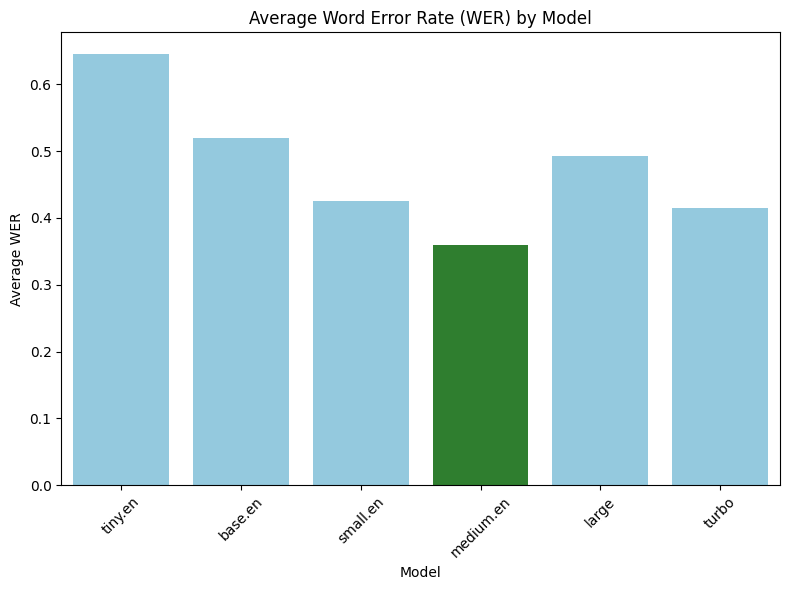


Performance Results:
tiny.en: Avg WER = 0.6453055141579732
base.en: Avg WER = 0.5201192250372578
small.en: Avg WER = 0.4247391952309985
medium.en: Avg WER = 0.3591654247391952
large: Avg WER = 0.4932935916542474
turbo: Avg WER = 0.4143070044709389


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import editdistance
import seaborn as sns

def calculate_wer(reference, hypothesis):
    """Calculates the Word Error Rate (WER) between two strings."""
    ref_words = reference.split()
    hyp_words = hypothesis.split()
    if not ref_words:  # Handle empty reference string to avoid ZeroDivisionError
        return 1.0 if hyp_words else 0.0
    return editdistance.eval(ref_words, hyp_words) / len(ref_words)

# Dictionary mapping model names to their transcript variables
models = {
    'tiny.en': tiny_en,
    'base.en': base_en,
    'small.en': small_en,
    'medium.en': medium_en,
    'large': large,
    'turbo': turbo
}

results = {}

for model_name, transcript in models.items():
    wer_scores = []

    # Ensure HUMAN is a string, remove newlines, and strip whitespace
    human_text = str(HUMAN).replace('\n', ' ').strip()
    if not human_text:
        print(f"Warning: HUMAN transcript is empty for comparison with {model_name}.")
        results[model_name] = {'avg_wer': np.nan}
        continue

    # Convert model transcript to string, remove newlines, and strip whitespace
    model_text = str(transcript).replace('\n', ' ').strip()
    if model_text:
        wer = calculate_wer(human_text, model_text)
        wer_scores.append(wer)
    else:
        # If model text is empty, assign maximum error or handle as appropriate
        wer_scores.append(1.0 if human_text else 0.0)

    if wer_scores:
        avg_wer = np.mean(wer_scores)
        results[model_name] = {'avg_wer': avg_wer}
    else:
        results[model_name] = {'avg_wer': np.nan}

# Prepare data for plotting
model_names = list(results.keys())
avg_wers = [results[model]['avg_wer'] for model in model_names]

# Find the index of the smallest WER
min_wer_index = np.argmin([wer if not np.isnan(wer) else np.inf for wer in avg_wers])
# Create colors list, default to blue, set smallest WER to green
wer_colors = ['skyblue'] * len(model_names)
wer_colors[min_wer_index] = 'forestgreen'

# Create plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=avg_wers, palette=wer_colors)
plt.title('Average Word Error Rate (WER) by Model')
plt.ylabel('Average WER')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nPerformance Results:")
for model_name, scores in results.items():
    avg_wer = scores['avg_wer']
    print(f"{model_name}: Avg WER = {avg_wer}")

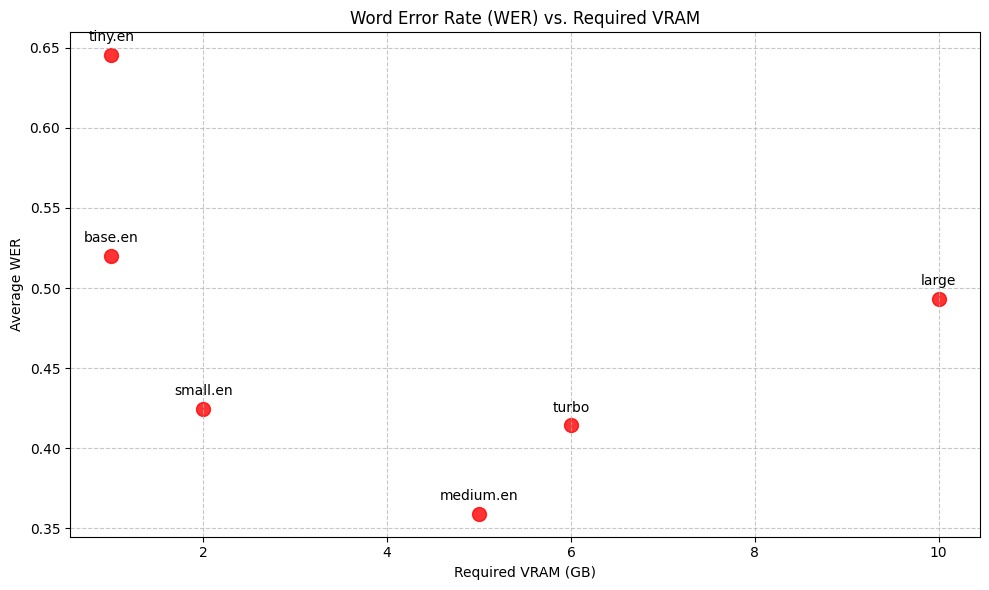

In [8]:
def plot_wer_vs_vram_scatter():
    """
    Plots Word Error Rate (WER) against Required VRAM for each model,
    using a scatter plot and no quadrant functionality.
    """
    # Data provided by the user for WER
    wer_data = {
        'tiny.en': results['tiny.en']['avg_wer'],
        'base.en': results['base.en']['avg_wer'],
        'small.en': results['small.en']['avg_wer'],
        'medium.en': results['medium.en']['avg_wer'],
        'large': results['large']['avg_wer'],
        'turbo': results['turbo']['avg_wer']
    }

    # Data extracted from the image for VRAM and Speed (only VRAM needed here)
    model_performance_data = {
        'tiny': {'required_vram': 1},
        'base': {'required_vram': 1},
        'small': {'required_vram': 2},
        'medium': {'required_vram': 5},
        'large': {'required_vram': 10},
        'turbo': {'required_vram': 6}
    }

    # Consolidate data, mapping .en models to their base names
    consolidated_data = []
    for model_wer_name, wer_value in wer_data.items():
        base_model_name = model_wer_name.replace('.en', '') # Remove .en for matching
        if base_model_name in model_performance_data:
            perf_info = model_performance_data[base_model_name]
            consolidated_data.append({
                'model_name': model_wer_name,
                'wer': wer_value,
                'vram': perf_info['required_vram']
            })

    # Extract lists for plotting
    model_names = [d['model_name'] for d in consolidated_data]
    wers = [d['wer'] for d in consolidated_data]
    vrams = [d['vram'] for d in consolidated_data]

    # Create a single plot
    plt.figure(figsize=(10, 6))
    ax = plt.gca() # Get current axes

    ax.scatter(vrams, wers, color='red', s=100, alpha=0.8)
    ax.set_title('Word Error Rate (WER) vs. Required VRAM')
    ax.set_xlabel('Required VRAM (GB)')
    ax.set_ylabel('Average WER')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Annotate points with model names
    for i, txt in enumerate(model_names):
        ax.annotate(txt, (vrams[i], wers[i]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()

# Call the function to generate the plot
plot_wer_vs_vram_scatter()

# USING Faster - Whisper


In [9]:

from faster_whisper import WhisperModel
import torch

# Define the model size you want to use (e.g., "tiny-int8", "base", "small", "medium", "large-v2")
# Using int8 models can reduce memory usage and potentially increase speed on some hardware
# available_models = ["tiny", "tiny.en", "base", "base.en", "small", "small.en", "medium", "medium.en", "large-v1", "large-v2", "large-v3"]
# Use int8 versions for potentially faster inference with less VRAM if available and supported
# For English, ".en" models are faster but only work for English.
model_size = "medium.en" # Example: Using a quantized English small model

print(f"Loading Faster Whisper model: {model_size}")
try:
    # You can specify device as "cuda" if you have a GPU or "cpu" if not.
    # compute_type can be "int8", "float16", "float32".
    # "int8" is generally fastest and uses least VRAM on supported hardware (like recent GPUs).
    # "float16" is a good balance for GPUs. "float32" is for CPUs or less capable GPUs.
    model = WhisperModel(model_size, device="cuda" if torch.cuda.is_available() else "cpu", compute_type="int8")

    print(f"Transcribing audio file: {audio_file} with Faster Whisper ({model_size})")
    segments, info = model.transcribe(audio_file, beam_size=5)

    faster_whisper_transcript = ""
    print("Faster Whisper Transcription:")
    for segment in segments:
        print(f"[{segment.start:.2f}s -> {segment.end:.2f}s] {segment.text}")
        faster_whisper_transcript += segment.text + " "

    # Store the transcript in a variable
    # Remove leading/trailing whitespace and replace multiple spaces with single space
    faster_whisper_transcript = " ".join(faster_whisper_transcript.split()).strip()

    print("\nFaster Whisper transcription stored in 'faster_whisper_transcript'.")
    print(f"Example: {faster_whisper_transcript[:200]}...") # Print first 200 chars as example

    # Optionally, calculate WER for the Faster Whisper transcript
    print("\nCalculating WER for Faster Whisper transcript...")
    human_text = str(HUMAN).replace('\n', ' ').strip()
    if human_text and faster_whisper_transcript:
        wer_faster_whisper = calculate_wer(human_text, faster_whisper_transcript)
        print(f"Faster Whisper ({model_size}) WER: {wer_faster_whisper}")
    elif not human_text:
         print("Warning: HUMAN transcript is empty. Cannot calculate WER.")
    else:
         print("Warning: Faster Whisper transcript is empty. Cannot calculate WER.")

except Exception as e:
    print(f"Error using Faster Whisper: {e}")
    faster_whisper_transcript = f"Error: {e}"



Loading Faster Whisper model: medium.en


config.json: 0.00B [00:00, ?B/s]

vocabulary.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/1.53G [00:00<?, ?B/s]

Transcribing audio file: temp_audio.wav with Faster Whisper (medium.en)
Faster Whisper Transcription:
[0.00s -> 13.28s]  Okay, so the drive you're going to complete will use the automation and the object detection
[13.28s -> 14.28s]  systems.
[14.28s -> 15.28s]  That means you will not need to operate the vehicle.
[15.28s -> 19.28s]  So keep your hands off the steering wheel and feet off the pedals once we get that
[19.28s -> 20.28s]  drive.
[20.28s -> 21.28s]  Okay.
[21.28s -> 23.80s]  So when you see that sim driver indicator highlight green, make sure you don't hit
[23.80s -> 26.56s]  the brake at any point during the drive.
[26.56s -> 30.64s]  This drive, the car cab lookout, will have the ODS for getting visual feedback for targets
[30.64s -> 31.64s]  that are in the environment.
[31.64s -> 35.60s]  So the car cab lookout should pay attention to that screen to aid them and everyone else
[35.60s -> 36.60s]  during the mission.
[36.60s -> 40.60s]  Remember to tap the targets on that

# COMPARING THEIR TRANSCRIPTION TIMES

Using existing audio file: temp_audio.wav

Attempting to use device: CUDA

--- Initializing Whisper (original) model ---


100%|█████████████████████████████████████| 1.42G/1.42G [00:47<00:00, 32.2MiB/s]


Original Whisper 'medium.en' model loaded on CUDA.

--- Initializing Faster Whisper model ---
Faster Whisper 'medium.en' model loaded on CUDA (int8).

--- Starting Transcription Comparison ---

Original Whisper Transcription Time: 61.5068 seconds
Transcription (Original Whisper): "Okay, so the drive you're going to complete will use the automation and the object detection systems. That means you will not need to operate the vehicle. So keep your hands off the steering wheel and feet off the pedals once we get that drive. Okay. So when you see that sim driver indicator highlight green, make sure you don't hit the brake at any point during the drive. Once you drive the car cab lookout, we'll have the ODS. We're getting visual feedback for targets that are in the environment. So the car cab lookout should pay attention to that screen to aid them and everyone else during the mission. Remember to tap the targets on that ODS as well as completing those workstation tasks. All right, so all dr

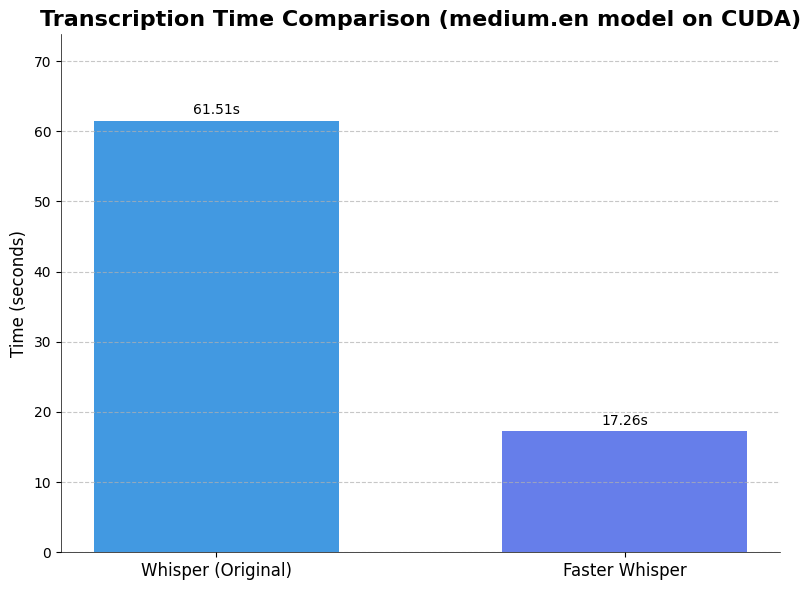

In [10]:
import time
import os
import whisper # Assuming you have openai-whisper installed
from faster_whisper import WhisperModel
import numpy as np
import soundfile as sf # For creating a dummy audio file
import matplotlib.pyplot as plt # For plotting

# --- GLOBAL SETTINGS ---
# Set to True to attempt using CUDA (GPU) if available, False to force CPU.
# Ensure you have the necessary CUDA drivers and PyTorch/TensorFlow with CUDA support
# installed for GPU acceleration.
USE_CUDA_IF_AVAILABLE = True

# --- 1. Create a dummy audio file for demonstration ---
# In a real scenario, you would replace 'temp_audio.wav' with your actual audio file.
# This creates a 10-second mono WAV file with some random noise.
audio_filename = "temp_audio.wav"
sample_rate = 16000 # Standard for Whisper models
duration = 10 # seconds
if not os.path.exists(audio_filename):
    print(f"Creating a dummy audio file: {audio_filename}")
    # Generate some random audio data
    dummy_audio_data = np.random.uniform(-0.5, 0.5, int(sample_rate * duration)).astype(np.float32)
    sf.write(audio_filename, dummy_audio_data, sample_rate)
    print("Dummy audio file created successfully.")
else:
    print(f"Using existing audio file: {audio_filename}")

# Determine the device based on the global setting
device_to_use = "cuda" if USE_CUDA_IF_AVAILABLE else "cpu"
print(f"\nAttempting to use device: {device_to_use.upper()}")


# --- 2. Load Whisper Models ---
# Using the 'medium.en' model as requested.
# Note: The first time you run this, it will download the models, which can take a while
# for larger models like 'medium.en'.

print("\n--- Initializing Whisper (original) model ---")
# Original Whisper model (from openai-whisper)
# Ensure you have 'pip install openai-whisper'
try:
    # Original Whisper's load_model automatically uses GPU if available unless specified otherwise.
    # We explicitly set it here for consistency with the user's choice.
    original_whisper_model = whisper.load_model("medium.en", device=device_to_use)
    print(f"Original Whisper 'medium.en' model loaded on {device_to_use.upper()}.")
except Exception as e:
    print(f"Error loading original Whisper model on {device_to_use.upper()}: {e}")
    print("Please ensure 'openai-whisper' is installed and CUDA is properly configured if using GPU.")
    original_whisper_model = None

print("\n--- Initializing Faster Whisper model ---")
# Faster Whisper model (from faster-whisper)
# Ensure you have 'pip install faster-whisper'
try:
    faster_whisper_model = WhisperModel("medium.en", device=device_to_use, compute_type="int8")
    print(f"Faster Whisper 'medium.en' model loaded on {device_to_use.upper()} (int8).")
except Exception as e:
    print(f"Error loading Faster Whisper model on {device_to_use.upper()}: {e}")
    print("Please ensure 'faster-whisper' is installed and CUDA is properly configured if using GPU.")
    faster_whisper_model = None

# Initialize transcription times to None, in case a model fails to load
time_whisper = None
time_faster_whisper = None

# --- 3. Perform Transcription and Measure Times ---
print("\n--- Starting Transcription Comparison ---")

# Transcription with original Whisper
if original_whisper_model:
    start_time_whisper = time.time()
    try:
        # The transcribe method returns a dictionary
        result_whisper = original_whisper_model.transcribe(audio_filename)
        transcription_whisper = result_whisper["text"]
        end_time_whisper = time.time()
        time_whisper = end_time_whisper - start_time_whisper
        print(f"\nOriginal Whisper Transcription Time: {time_whisper:.4f} seconds")
        print(f"Transcription (Original Whisper): \"{transcription_whisper.strip()}\"")
    except Exception as e:
        print(f"Error during original Whisper transcription: {e}")
else:
    print("\nOriginal Whisper model not loaded, skipping transcription.")


# Transcription with Faster Whisper
if faster_whisper_model:
    start_time_faster_whisper = time.time()
    try:
        # Faster Whisper returns segments and info
        segments, info = faster_whisper_model.transcribe(audio_filename, beam_size=5)
        # Concatenate segments to get full text
        transcription_faster_whisper = "".join([segment.text for segment in segments])
        end_time_faster_whisper = time.time()
        time_faster_whisper = end_time_faster_whisper - start_time_faster_whisper
        print(f"\nFaster Whisper Transcription Time: {time_faster_whisper:.4f} seconds")
        print(f"Transcription (Faster Whisper): \"{transcription_faster_whisper.strip()}\"")
    except Exception as e:
        print(f"Error during Faster Whisper transcription: {e}")
else:
    print("\nFaster Whisper model not loaded, skipping transcription.")

print("\n--- Transcription Comparison Complete ---")


# --- 4. Plotting the results using Matplotlib ---
# Only plot if both transcription times were successfully obtained
if time_whisper is not None and time_faster_whisper is not None:
    print("\n--- Generating Plot ---")
    labels = ['Whisper (Original)', 'Faster Whisper']
    times = [time_whisper, time_faster_whisper]
    colors = ['#4299e1', '#667eea'] # A nice blue and indigo for distinction

    fig, ax = plt.subplots(figsize=(8, 6)) # Set a good figure size

    # Plotting the bars
    bars = ax.bar(labels, times, color=colors, width=0.6)

    # Add title and labels
    ax.set_title(f'Transcription Time Comparison (medium.en model on {device_to_use.upper()})', fontsize=16, fontweight='bold')
    ax.set_ylabel('Time (seconds)', fontsize=12)
    # Set y-axis limit to be 20% higher than the max time, ensuring it starts from 0
    ax.set_ylim(0, max(times) * 1.2 if times else 1) # Handle empty list case

    # Add the actual time values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}s',
                ha='center', va='bottom', fontsize=10, color='black')

    # Customize ticks and spines for a cleaner look
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

    # Add a grid for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Ensure tight layout to prevent labels from being cut off
    plt.tight_layout()

    # Display the plot
    plt.show()
else:
    print("\nSkipping plot generation: Transcription times could not be obtained for both models.")

# --- 5. Clean up dummy audio file (optional) ---
# if os.path.exists(audio_filename):
#     os.remove(audio_filename)
#     print(f"\nRemoved dummy audio file: {audio_filename}")


# COMPARING THEIR PERFORMANCE

In [11]:
!pip install jiwer -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.0 MB/s eta 0:00:0000:0100:01


Human Reference Transcription: "
Okay, so the drive you're going to complete will use the vehicle automation and the object detection system.
So that means you will not need to operate the vehicle. You should keep your hands off the steering wheel and feet off the pedals once we begin that drive.
Okay. So when you see that sim driver indicator highlight green, make sure you don't hit the brake at any point during the drive.
For this drive, the car cab lookout will have the ODS for getting visual feedback for targets that are in the environment.
So the car cab lookout should pay attention to that screen to aid them and everyone else during the mission.
Remember to tap the targets on that ODS as well as completing those workstation tasks. All right,
so all drivers put your foot on the brake. Do not remove your foot from the brake until I instruct you to remove it. Car cab driver,
you may start the car All drivers with your foot still on the brake. Keep it on the brake and do not start ye

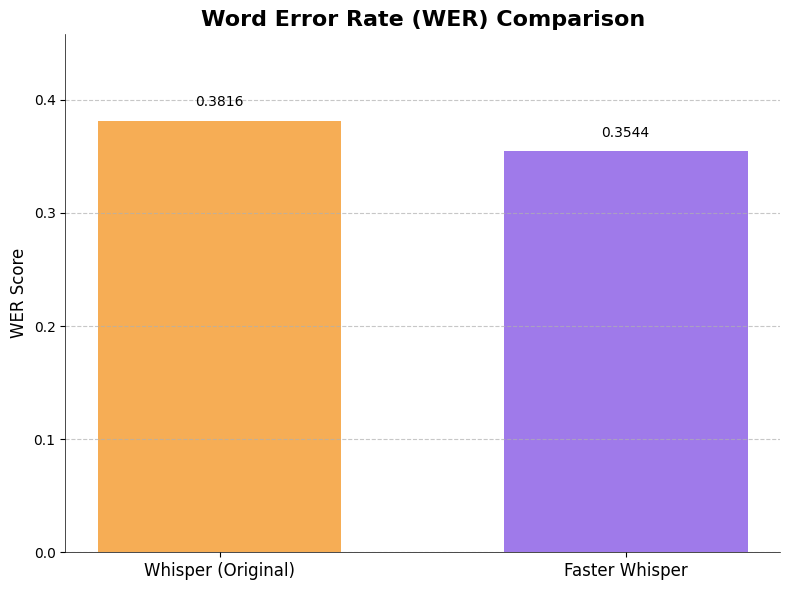

In [14]:
import matplotlib.pyplot as plt
import jiwer # For Word Error Rate (WER) calculation




print(f"Human Reference Transcription: \"{HUMAN}\"")


print(f"\nWhisper (Original) Hypothesis: \"{medium_en}\"")
print(f"Faster Whisper Hypothesis: \"{transcription_faster_whisper}\"")

# --- Calculate WER Scores ---
# jiwer.wer expects lists of strings for both reference and hypothesis.
wer_whisper = jiwer.wer(reference=[HUMAN], hypothesis=[medium_en])
wer_faster_whisper = jiwer.wer(reference=[HUMAN], hypothesis=[transcription_faster_whisper])

print(f"\nWER (Original Whisper): {wer_whisper:.4f}")
print(f"WER (Faster Whisper): {wer_faster_whisper:.4f}")

# --- Plotting the WER results using Matplotlib ---
print("\n--- Generating WER Plot ---")

labels = ['Whisper (Original)', 'Faster Whisper']
wer_scores = [wer_whisper, wer_faster_whisper]
colors = ['#f6ad55', '#9f7aea'] # Orange and Purple for WER distinction

fig, ax = plt.subplots(figsize=(8, 6)) # Set a good figure size

# Plotting the bars
bars = ax.bar(labels, wer_scores, color=colors, width=0.6)

# Add title and labels
ax.set_title('Word Error Rate (WER) Comparison', fontsize=16, fontweight='bold')
ax.set_ylabel('WER Score', fontsize=12)
ax.set_ylim(0, max(wer_scores) * 1.2 if wer_scores else 1) # Set y-axis limit, ensuring it starts from 0

# Add the actual WER values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}',
            ha='center', va='bottom', fontsize=10, color='black')

# Customize ticks and spines for a cleaner look
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure tight layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()
